                     1. open  2. high    3. low  4. close  5. volume
date                                                                
2021-12-31 20:00:00   336.79   336.79  336.7900  336.7900      161.0
2021-12-31 19:56:00   336.65   336.65  336.6500  336.6500      126.0
2021-12-31 19:34:00   336.61   336.61  336.6100  336.6100      346.0
2021-12-31 19:33:00   336.61   336.61  336.6099  336.6099      410.0
2021-12-31 19:32:00   336.62   336.62  336.6200  336.6200      583.0
...                      ...      ...       ...       ...        ...
2021-12-20 04:07:00   317.90   317.90  317.9000  317.9000      796.0
2021-12-20 04:05:00   317.71   317.71  317.7100  317.7100      615.0
2021-12-20 04:04:00   317.37   317.37  317.3700  317.3700      836.0
2021-12-20 04:02:00   318.75   318.75  318.2000  318.2000     1191.0
2021-12-20 04:01:00   319.30   319.30  318.8100  318.8100     2232.0

[5041 rows x 5 columns]


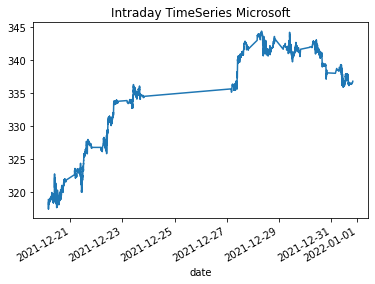

In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='RNZPXZ6Q9FEFMEHM',output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(data)

data['4. close'].plot()
plt.title('Intraday TimeSeries Microsoft')
plt.show()

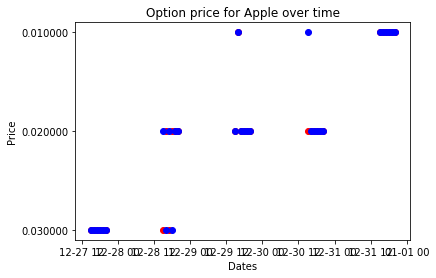

In [9]:
import robin_stocks.robinhood as r
import matplotlib.pyplot as plt
import datetime as dt

'''
This is example code that gets the past 30 days of opening and closing prices
for a specific option call or put. As far as I know, there is no way to view
past prices for options, so this is a very useful piece of code. This code also
plots the data using matplotlib, but the data is contained in the
historicalData list and you are free to do whatever you want with it.
NOTE: closing prices are plotted in red and opening prices plotted in blue.
Matplotlib also has a candlestick option that you can use.
'''

#!!! Fill out username and password
username = 'chymoney45@gmail.com'
password = 'notgivingyallshit'
login = r.login(username,password)

#!!! fill out the specific option information
symbol = 'AAPL'
symbol_name = r.get_name_by_symbol(symbol)
expirationDate = '2022-01-21' # format is YYYY-MM-DD.
strike = 260
optionType = 'call' # available options are 'call' or 'put' or None.
interval = 'hour' # available options are '5minute', '10minute', 'hour', 'day', and 'week'.
span = 'week' # available options are 'day', 'week', 'year', and '5year'.
bounds = 'regular' # available options are 'regular', 'trading', and 'extended'.
info = None
#!!!

historicalData = r.get_option_historicals(symbol, expirationDate, strike, optionType, interval, span, bounds, info)

dates = []
closingPrices = []
openPrices = []

for data_point in historicalData:
    dates.append(data_point['begins_at'])
    closingPrices.append(data_point['close_price'])
    openPrices.append(data_point['open_price'])

# change the dates into a format that matplotlib can recognize.
x = [dt.datetime.strptime(d,'%Y-%m-%dT%H:%M:%SZ') for d in dates]

# plot the data.
plt.plot(x, closingPrices, 'ro')
plt.plot(x, openPrices, 'bo')
plt.title("Option price for {} over time".format(symbol_name))
plt.xlabel("Dates")
plt.ylabel("Price")
plt.show()